# Title

In [1]:
import pandas as pd
import numpy as np
import os, sys
from flask import Flask, render_template, redirect, request, jsonify 
import time
import random
import json
import seaborn as sns
import matplotlib.pyplot  as plt
from utils.apis_tb import dfjson

In [2]:
os.path.abspath('')  ## de weg naar de file waar je nu bent

'c:\\Users\\Roxan\\OneDrive\\Documentos\\Repo_August_project\\Project_August_Corona\\Roxanna\\src'

In [3]:
root_path = os.path.dirname(os.path.abspath('')) # één stap naar boven om in de "hoofdmap te zijn"
sys.path.append(root_path) ##sys path toevoegen naar hoofdmap
print(root_path)

c:\Users\Roxan\OneDrive\Documentos\Repo_August_project\Project_August_Corona\Roxanna


In [4]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
Data_all_countries = data[(data.location == "Spain") | (data.location == "Iran") | (data.location == "Netherlands") | (data.location == "Mexico") | (data.location == "Brazil")] #Filtering our countries from dataset

In [25]:
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33832,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33833,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33834,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33835,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dfjson(Data_all_countries)

'se ha cargado el archivo mean.json en el path'

In [7]:
#mean_per_day = Data_all_countries.groupby("date")["total_cases"].mean() #calculating mean per day of all countries
#json_mean_total_cases = mean_per_day.to_json("Mean_per_day.json") #converting to Json


In [8]:
Data_all_countries.date = pd.to_datetime(Data_all_countries.date) #changing date to datetime and setting as index
data_covid = Data_all_countries.set_index("date")
data_covid

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26,ESP,Europe,Spain,272421.0,0.0,28432.0,0.0,5826.591,0.000,608.109,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2020-07-27,ESP,Europe,Spain,278782.0,6361.0,28434.0,2.0,5962.641,136.050,608.152,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2020-07-28,ESP,Europe,Spain,280610.0,1828.0,28436.0,2.0,6001.739,39.098,608.194,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


In [9]:
data_covid.handwashing_facilities.isnull().count() #TODO # All rows have None value for, to be deleted?  

1069

In [10]:
#Many values that are 0. 

In [11]:
del data_covid["handwashing_facilities"] #deleting column with almost all values NaN

In [12]:
data_covid.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

In [13]:
data_covid_columns = data_covid[["location","total_cases", "total_deaths", "new_cases", "new_deaths"]] ## filtering the dataframe with the columns that we will need for question 7.A

In [14]:
data_covid_columns

,location,total_cases,total_deaths,new_cases,new_deaths
date,,,,,
2019-12-31,Brazil,0.0,0.0,0.0,0.0
2020-01-01,Brazil,0.0,0.0,0.0,0.0
2020-01-02,Brazil,0.0,0.0,0.0,0.0
2020-01-03,Brazil,0.0,0.0,0.0,0.0
2020-01-04,Brazil,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-07-26,Spain,272421.0,28432.0,0.0,0.0
2020-07-27,Spain,278782.0,28434.0,6361.0,2.0
2020-07-28,Spain,280610.0,28436.0,1828.0,2.0


In [15]:

data_brazil = data_covid_columns[data_covid_columns.location == "Brazil"] #dividing dataframe per country
data_spain = data_covid_columns[data_covid_columns.location == "Spain"] 
data_iran = data_covid_columns[data_covid_columns.location == "Iran"] 
data_mexico = data_covid_columns[data_covid_columns.location == "Mexico"]
data_netherlands = data_covid_columns[data_covid_columns.location == "Netherlands"]

In [16]:
start_q_spain = "2020-03-14"
start_q_brazil = "2020-03-17"
start_q_netherlands = "2020-03-12"
start_q_iran = "2020-03-25"
start_q_mexico = "2020-03-30"

In [17]:
data_spain

,location,total_cases,total_deaths,new_cases,new_deaths
date,,,,,
2019-12-31,Spain,0.0,0.0,0.0,0.0
2020-01-01,Spain,0.0,0.0,0.0,0.0
2020-01-02,Spain,0.0,0.0,0.0,0.0
2020-01-03,Spain,0.0,0.0,0.0,0.0
2020-01-04,Spain,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-07-26,Spain,272421.0,28432.0,0.0,0.0
2020-07-27,Spain,278782.0,28434.0,6361.0,2.0
2020-07-28,Spain,280610.0,28436.0,1828.0,2.0


Text(0.5, 1.0, 'Spain total deaths and new cases')

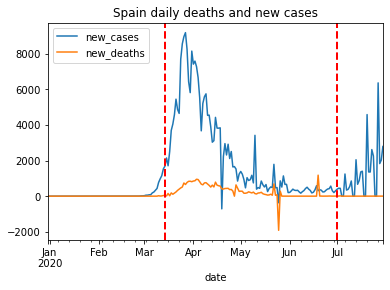

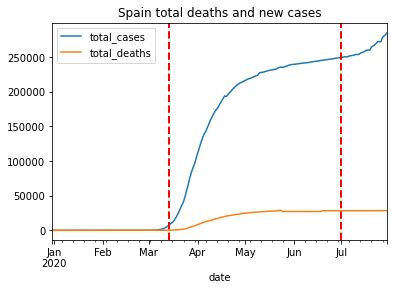

In [24]:

ax = data_spain[["new_cases", "new_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-14'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2020-07-01'), color='r', linestyle='--', lw=2, label="test")
plt.title("Spain daily deaths and new cases")
#plt.text(pd.to_datetime('2020-03-14'), 0.5, 'hello', horizontalalignment='center')


ax = data_spain[["total_cases", "total_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-14'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2020-07-01'), color='r', linestyle='--', lw=2, label="test")
plt.title("Spain total deaths and new cases")